# Practical Geopandas

In [4]:
%matplotlib inline 

import matplotlib

matplotlib.rcParams['figure.figsize'] = 10, 10

In [5]:
import pandas as pd
df = pd.read_json('countries.geojson')
df.head()
df.shape

,features,type
0,"{'type': 'Feature', 'id': 'AFG', 'properties':...",FeatureCollection
1,"{'type': 'Feature', 'id': 'AGO', 'properties':...",FeatureCollection
2,"{'type': 'Feature', 'id': 'ALB', 'properties':...",FeatureCollection
3,"{'type': 'Feature', 'id': 'ARE', 'properties':...",FeatureCollection
4,"{'type': 'Feature', 'id': 'ARG', 'properties':...",FeatureCollection


(179, 2)

In [6]:
df.plot()

TypeError: Empty 'DataFrame': no numeric data to plot

(179, 3)

C:\Users\DPAD\Anaconda3\envs\geopandasworkshop\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


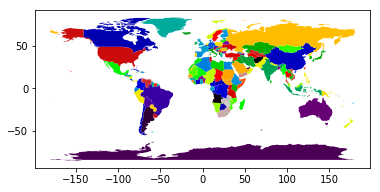

In [9]:
import geopandas as gpd
gdf = gpd.read_file('countries.geojson')
gdf.shape
gdf.plot(cmap='spectral')

In [ ]:
convenience_stores = gpd.read_file('convenience_stores.geojson')
convenience_stores.plot()

,city,VARNAME_2,geometry
0,None,None,(POLYGON ((121.0195312500001 14.68939018249523...
1,None,Las Pinas,"(POLYGON ((120.985710144043 14.48585033416743,..."
2,None,Makati,(POLYGON ((121.0217514038088 14.57696056365972...
3,None,Malabon,(POLYGON ((120.9358291625981 14.69478034973167...
4,None,Mandaluyong,"(POLYGON ((121.057373046875 14.60128021240257,..."


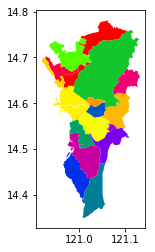

In [11]:
metro_manila_boundary = gpd.read_file('metro_manila.geojson')
metro_manila_boundary.plot(cmap='prism')
metro_manila_boundary.head()

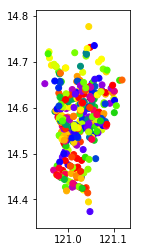

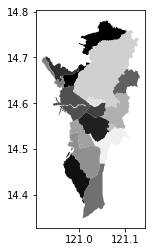

In [16]:
convenience_stores = gpd.read_file('convenience_stores.geojson')
# base = metro_manila_boundary.plot(cmap='gray')
# convenience_stores.plot(ax=base, cmap='prism' )
convenience_stores.plot(cmap='prism')
metro_manila_boundary.plot(cmap='gray')

In [18]:
metro_manila_boundary
san_juan = metro_manila_boundary[metro_manila_boundary['VARNAME_2']=='San Juan']
san_juan

,city,VARNAME_2,geometry
0,None,None,(POLYGON ((121.0195312500001 14.68939018249523...
1,None,Las Pinas,"(POLYGON ((120.985710144043 14.48585033416743,..."
2,None,Makati,(POLYGON ((121.0217514038088 14.57696056365972...
3,None,Malabon,(POLYGON ((120.9358291625981 14.69478034973167...
4,None,Mandaluyong,"(POLYGON ((121.057373046875 14.60128021240257,..."
5,None,Manila,(POLYGON ((120.9788589477539 14.63668060302735...
6,None,Marikina,"(POLYGON ((121.107276916504 14.6713104248048, ..."
7,None,Muntinlupa,"(POLYGON ((121.046760559082 14.46838092803955,..."
8,None,Navotas,(POLYGON ((120.9293975830078 14.69242095947271...
9,None,Paranaque,(POLYGON ((120.9864654541018 14.50256824493431...


,city,VARNAME_2,geometry
14,None,San Juan,(POLYGON ((121.0236206054688 14.61240100860596...


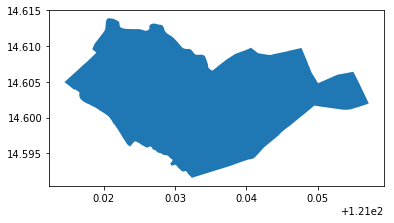

In [19]:
san_juan.plot()

In [21]:
from geopandas.tools import sjoin

san_juan_stores = sjoin(convenience_stores, san_juan, how='left')
san_juan_stores

,lon,lat,osm_id,timestamp,name,type,city_PSGC,city_left,pop_2010,proj_pop_2014,brand,geometry,index_right,city_right,VARNAME_2
0,121.044850,14.554797,251456674,2013-01-12T10:13:24,7-Eleven,convenience,137602000,Makati,529039.0,545739.0,7-Eleven,POINT (121.0448502 14.5547968),NaN,NaN,NaN
1,121.048866,14.620746,255059125,2011-02-14T18:57:01,7-Eleven,convenience,137404000,Quezon City,2761720.0,3054375.0,7-Eleven,POINT (121.0488664 14.6207458),NaN,NaN,NaN
2,121.048530,14.731620,255059325,2011-02-14T19:04:45,7-Eleven,convenience,137404000,Quezon City,2761720.0,3054375.0,7-Eleven,POINT (121.04853 14.73162),NaN,NaN,NaN
3,121.047189,14.572810,255059386,2013-10-14T04:09:44,7-Eleven,convenience,137401000,Mandaluyong,328699.0,347633.0,7-Eleven,POINT (121.0471894 14.5728103),NaN,NaN,NaN
4,121.028173,14.561717,255060723,2013-02-03T00:33:21,7-Eleven,convenience,137602000,Makati,529039.0,545739.0,7-Eleven,POINT (121.0281729 14.5617174),NaN,NaN,NaN
5,121.029412,14.563373,255061254,2012-05-31T07:30:29,7-Eleven,convenience,137602000,Makati,529039.0,545739.0,7-Eleven,POINT (121.029412 14.5633734),NaN,NaN,NaN
6,120.989250,14.624060,255061513,2014-04-06T06:43:49,7-Eleven,convenience,137404000,Quezon City,2761720.0,3054375.0,7-Eleven,POINT (120.98925 14.62406),NaN,NaN,NaN
7,120.989261,14.576414,255063041,2013-10-14T04:54:51,7-Eleven,convenience,133900000,Manila,1652171.0,1662770.0,7-Eleven,POINT (120.9892613 14.5764143),NaN,NaN,NaN
8,121.011125,14.562988,255065460,2012-11-09T11:43:44,Ministop,convenience,137602000,Makati,529039.0,545739.0,Ministop,POINT (121.011125 14.5629885),NaN,NaN,NaN
9,120.979635,14.451294,255066480,2012-06-06T17:42:31,Mini Stop,convenience,137601000,Las Pinas,552573.0,625557.0,Ministop,POINT (120.9796346 14.451294),NaN,NaN,NaN


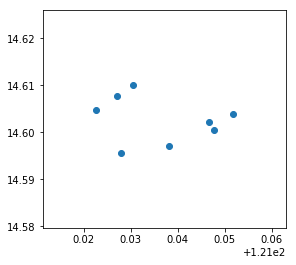

In [22]:
san_juan_stores = san_juan_stores[san_juan_stores['VARNAME_2']=='San Juan']
san_juan_stores.plot()

{'init': 'epsg:4326'}

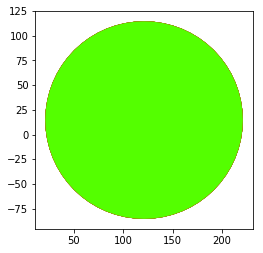

In [28]:
san_juan_base = san_juan.plot(cmap='gray')
san_juan_stores.buffer(100).plot(ax=san_juan_base, cmap='prism')

san_juan.crs

In [32]:
san_juan_stores.to_file('sj_cs.shp')
san_juan.to_file('san_juan_boundary.shp')

In [ ]:
san_juan_buffers = san_juan_stores.buffer(100)
san_juan_buffers.plot(ax=san_juan_base)

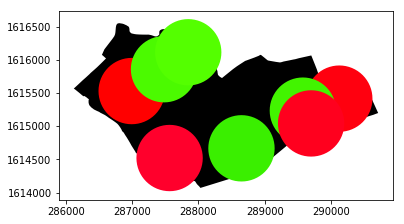

In [31]:
san_juan_utm = san_juan.to_crs(epsg=32651)
san_juan_stores_utm = san_juan_stores.to_crs(epsg=32651)

utm_base = san_juan_utm.plot(cmap='gray')
san_juan_stores_utm.buffer(500).plot(ax=utm_base, cmap='prism')

In [ ]:
import geopandas_osm.osm

In [ ]:
roads_df = geopandas_osm.osm.query_osm('way', san_juan, recurse='down', tags='highway')

In [ ]:
san_juan

In [1]:
1 + 1

2

In [2]:
a = 'Open Data Day'

In [3]:
a

'Open Data Day'